# **Data Exploration**

## Importing libraries and data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(filepath_or_buffer = './potholes.csv')

## Exploring data

In [65]:
df.head()

,pothole-number,object-class,x,y,width,height,bags-used
0,101,0,0.486675,0.537695,0.913915,0.908194,0.50
1,102,0,0.567634,0.468268,0.355968,0.874786,1.00
2,1032,0,0.482333,0.521441,0.502573,0.665523,0.25
3,1032,2,0.494340,0.593482,0.046312,0.723842,0.25
4,1033,0,0.426587,0.517153,0.473413,0.629503,0.25


In [67]:
df.shape

(654, 7)

We have 654 observations with 7 variables

In [70]:
df.columns

Index(['pothole-number', 'object-class', 'x', 'y', 'width', 'height',
       'bags-used'],
      dtype='object')

In [72]:
df.dtypes

pothole-number      int64
object-class        int64
x                 float64
y                 float64
width             float64
height            float64
bags-used         float64
dtype: object

<Axes: >

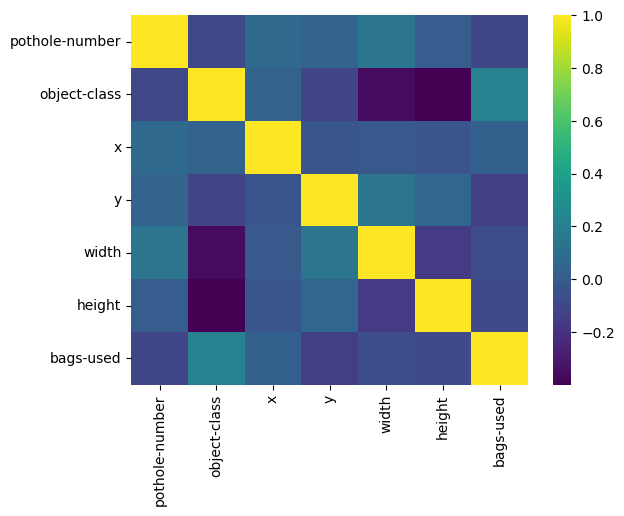

In [76]:
numerical_df = df.select_dtypes(exclude = object)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, cmap = 'viridis', annot = False)

It appears as though there's moderate correlation between the **width** and **height** of a pothole and the **bags-used**. The **object-class** also appears to have an influence on **bags-used**

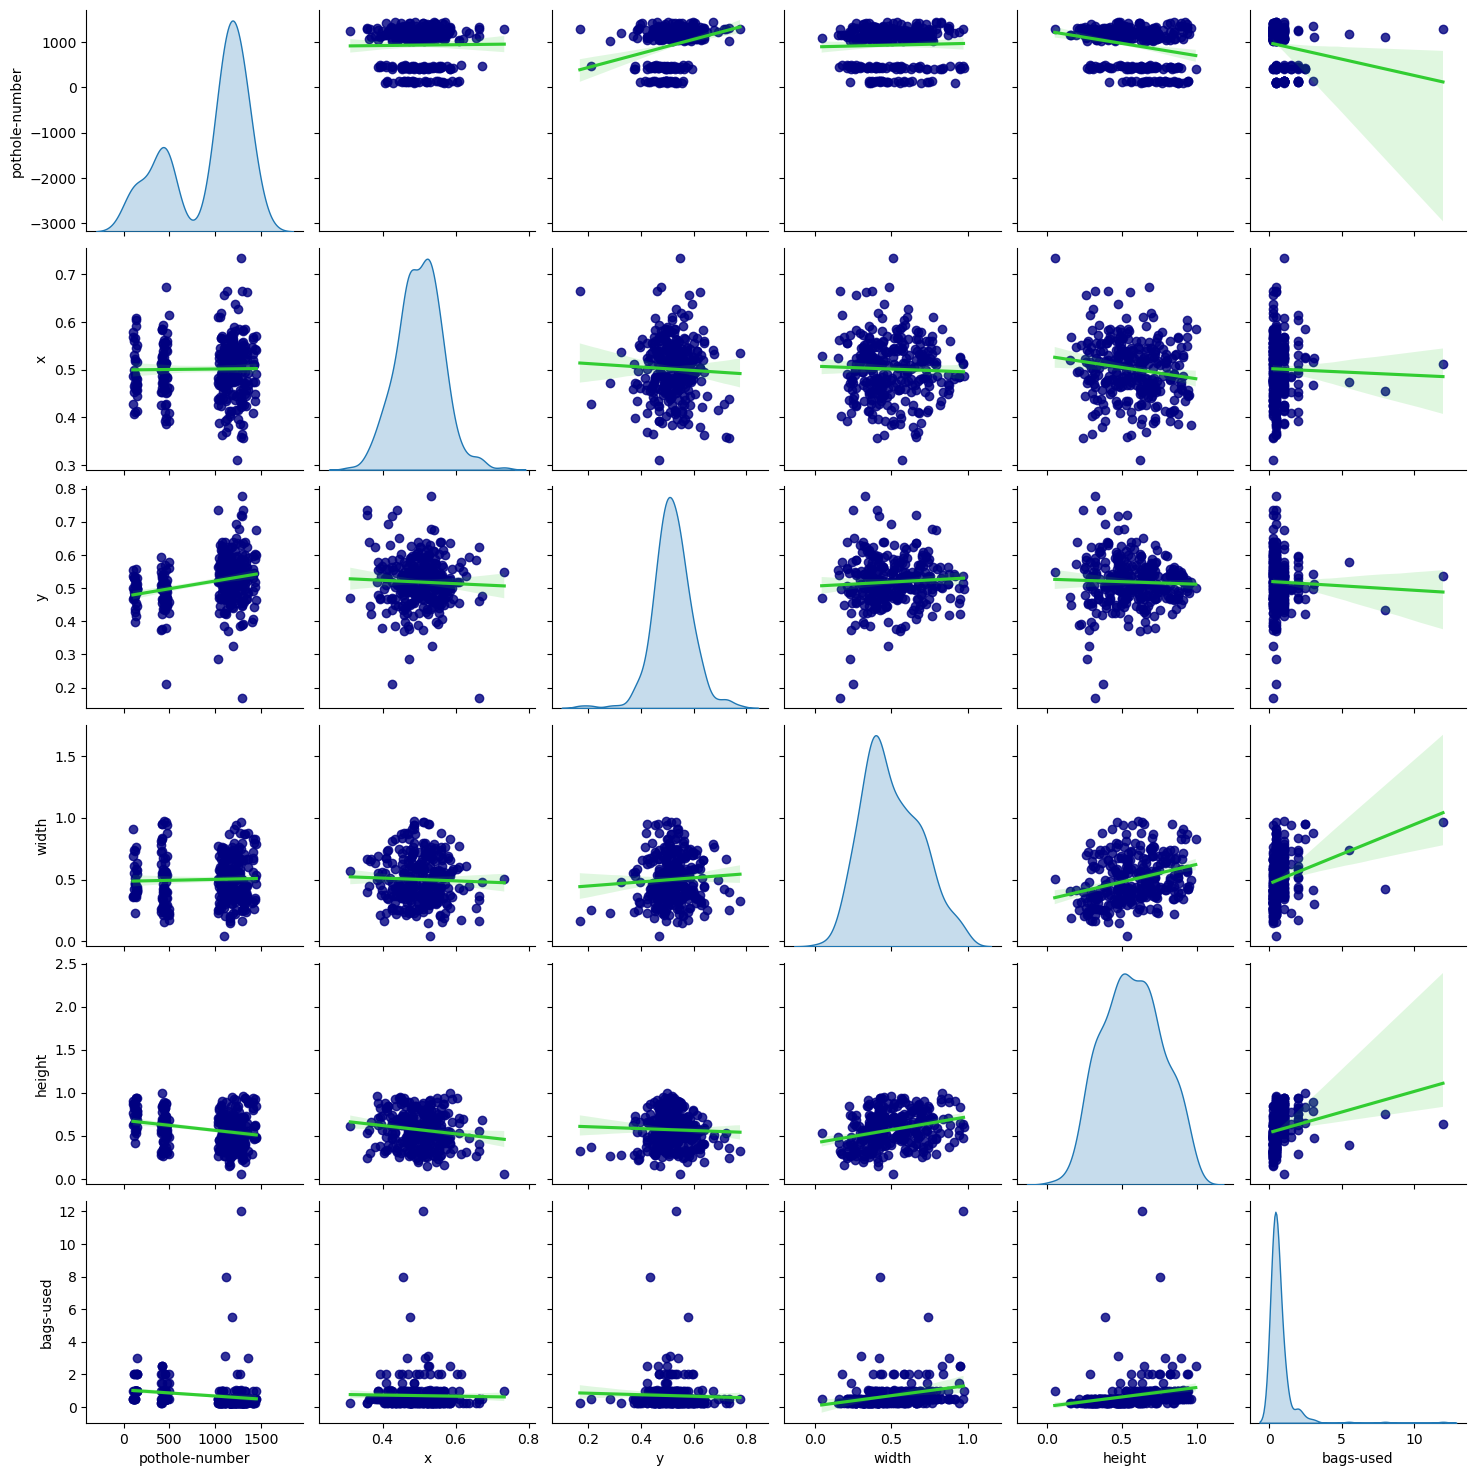

In [94]:
box_df = df[df['object-class'] == 0].drop(columns=['object-class'])
sns.pairplot(box_df, diag_kind = 'kde', kind = 'reg', plot_kws = {'line_kws':{'color':'limegreen'}, 'color':'navy'})

I filtered the data frame to only include images with a complete box on the pothole

Here we can see that **bags-used** has a fairly positive relationship with **width** and **height**

In [102]:
df_box[['width', 'bags-used']].corr()

,width,bags-used
width,1.000000,0.244157
bags-used,0.244157,1.000000


In [108]:
df_box[['height', 'bags-used']].corr()

,height,bags-used
height,1.00000,0.23554
bags-used,0.23554,1.00000


Let's see if this relationship holds for all observations

In [111]:
df[['width', 'bags-used']].corr()

,width,bags-used
width,1.000000,-0.075516
bags-used,-0.075516,1.000000


In [113]:
df[['height', 'bags-used']].corr()

,height,bags-used
height,1.000000,-0.083591
bags-used,-0.083591,1.000000


Now, we see a very weak negative correlation between these two variables and **bags-used**

In [116]:
df[['object-class', 'bags-used']].corr()

,object-class,bags-used
object-class,1.000000,0.221801
bags-used,0.221801,1.000000


In [122]:
df.corrwith(df['bags-used']).sort_values()

y                -0.142562
pothole-number   -0.113898
height           -0.083591
width            -0.075516
x                 0.023338
object-class      0.221801
bags-used         1.000000
dtype: float64

Considering all observations, it actually appears that **object-class** has the strongest correlation with **bags-used**

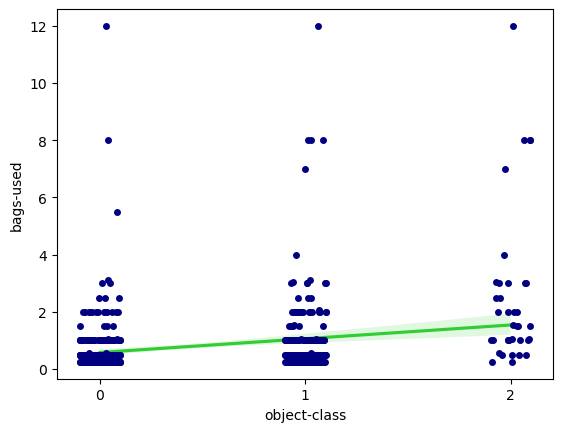

In [147]:
sns.stripplot(data=df, x='object-class', y='bags-used', jitter=True, color = 'navy')
sns.regplot(data=df, x='object-class', y='bags-used', scatter=False, color='limegreen')
plt.show()